<a href="https://colab.research.google.com/github/mahsoosalimi/100DaysOfCV/blob/main/D04_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Segmentation**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

(183, 275, 3)


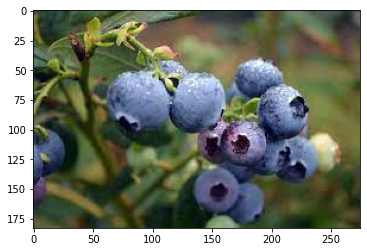

In [55]:
img = cv2.imread('./Blueberry2.jpeg').astype(np.float32) / 255.
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

original_shape = img.shape
print(img.shape)

plt.imshow(img)
plt.show()

In [56]:
# Flatten each channel of the image
data = img.reshape((-1, 3))
print(data.shape)

(50325, 3)


#**K-Means Clustering**


In [57]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(k, init='random')

In [58]:
kmeans.fit(reshaped_img)
KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,

    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',

    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [59]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[105, 108,  68],
       [ 94, 106, 142],
       [ 28,  38,  27],
       [144, 148, 103],
       [174, 185, 205],
       [ 64,  73,  50]], dtype=uint8)

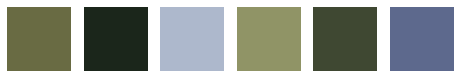

In [35]:
i = 1
plt.figure(0,figsize=(8,2))

# Storing info in color array
colors = []

for each_col in centers:
    plt.subplot(1, 6, i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [ ]:
# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()